In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np


In [4]:
df=pd.read_csv('./Data_reg/reg_simple.csv')
print(df)


    heure_rev  note
0           2    10
1           3    12
2           4    20
3           5    22
4           6    21
5           7    25
6           8    30
7           9    21
8          10    32
9          11    34
10         12    35
11         13    30
12         14    50
13         15    45
14         16    55
15         17    60
16         18    66
17         19    64
18         20    67
19         21    72
20         22    74
21         23    80
22         24    79
23         25    84
24         26    93
25         29    98
26         30    99


In [5]:
df.describe()

,heure_rev,note
count,27.000000,27.000000
mean,15.148148,51.037037
std,8.193354,27.743997
min,2.000000,10.000000
25%,8.500000,27.500000
50%,15.000000,50.000000
75%,21.500000,73.000000
max,30.000000,99.000000


In [7]:
x=df[['heure_rev']]
y=np.array(df['note'])

y=y.reshape(y.shape[0],1)

x.shape

(27, 1)

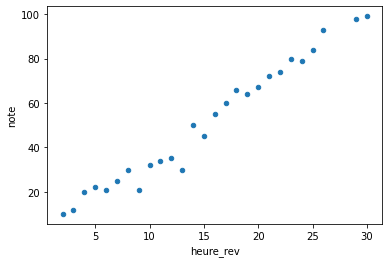

In [9]:
df.plot.scatter('heure_rev', 'note')

In [10]:
# Déterminer les corrélations les plus fortes
df.corrwith(df['heure_rev'], method = 'pearson').sort_values(ascending = False)

heure_rev    1.00000
note         0.98657
dtype: float64

In [6]:
#matrice X
X=np.hstack((x,np.ones(x.shape)))
X[:5]

array([[2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.]])

# Theta

In [7]:
#initialisation de theta
theta=np.random.randn(2,1)
theta.shape

(2, 1)

## Modèle


In [8]:
def model(X,theta):
    return X.dot(theta)
model(X,theta)

array([[ -2.47280256],
       [ -3.36139766],
       [ -4.24999275],
       [ -5.13858785],
       [ -6.02718295],
       [ -6.91577805],
       [ -7.80437315],
       [ -8.69296825],
       [ -9.58156335],
       [-10.47015845],
       [-11.35875354],
       [-12.24734864],
       [-13.13594374],
       [-14.02453884],
       [-14.91313394],
       [-15.80172904],
       [-16.69032414],
       [-17.57891923],
       [-18.46751433],
       [-19.35610943],
       [-20.24470453],
       [-21.13329963],
       [-22.02189473],
       [-22.91048983],
       [-23.79908493],
       [-26.46487022],
       [-27.35346532]])

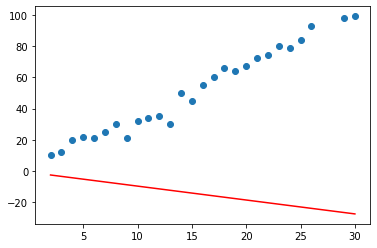

In [9]:
plt.scatter(x,y)
plt.plot(x,model(X,theta), color='r')

## Fonction coût

In [10]:
#Fonction Cout 

def cost_fonction(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)

In [11]:
cost_fonction(X,y,theta)

2713.1088959024696

# Gradient et descente de gradient


In [12]:
def grad (X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [13]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta-learning_rate* grad(X,y,theta)
        cost_history[i]=cost_fonction(X,y,theta)
    return theta,cost_history

 ## Theta Final 
 

In [14]:
n_iterations= 30
learning_rate =0.001
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate, n_iterations)


In [15]:
theta_final

array([[ 3.38701076],
       [-0.46927132]])

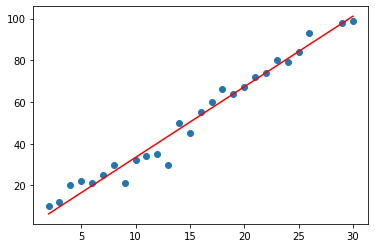

In [16]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c='r')

# Courbes d'apprentissage 


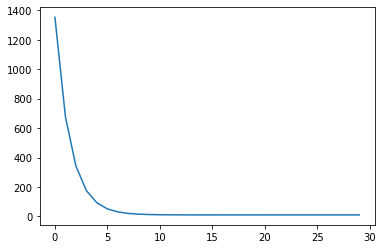

In [17]:
plt.plot(range(n_iterations),cost_history)

In [18]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v 
    

In [19]:
coef_determination(y,predictions)

0.9730795470485297